In [10]:
import numpy as np
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
import pickle

X = pickle.load(open('train.p'))
y = pickle.load(open('correct.p'))

longNames = ["Flick Left:1",
    "Flick Right:2",
    "Flick Up:3",
    "Flick Down:4",
    "Pan Left:5",
    "Pan Right:6",
    "Pan Up:7",
    "Pan Down:8",
    "Push:9",
    "Pull:10",
    "Double Tap:11",
    "Finger Wave Out:12",
    "Finger Wave In:13",
    "Whip:14",
    "Pluck:15",
    "Put:16",
    "Click:17",
    "Double Click:18",
    "Wobble:19",
    "Circle:20",
    "Erase:21"]

longNamesYY = ["FL:1",
    "FR:2",
    "FU:3",
    "FD:4",
    "PL:5",
    "PR:6",
    "PU:7",
    "PD:8",
    "Psh:9",
    "Pll:10",
    "DT:11",
    "FWO:12",
    "FWI:13",
    "Whp:14",
    "PCK:15",
    "Put:16",
    "Ck:17",
    "DCk:18",
    "Wob:19",
    "Cir:20",
    "Era:21"]


In [11]:
import scipy.signal as sp
from sklearn.preprocessing import StandardScaler



def get_maxima(row):
    lenfeat = 60
    backstart = 20
    idx = np.argmax(row[:lenfeat])
    strt = max([idx-backstart, 0])
    end = strt+lenfeat
    
    return (strt,end)

Xnew = []
# get maxima in the 
for i in range(X.shape[0]):
    mfiltsize = 5
    strt,end = get_maxima(X[i,0:99])
    strt, end = 0, 99
    feat1 = sp.medfilt( X[i,strt:end], mfiltsize)
    feat2 = sp.medfilt( X[i,strt+100:end+100], mfiltsize)
    feat3 = X[i, 200:]
    newrow = np.concatenate((feat1,feat2,feat3))
    Xnew.append(newrow)
    
    
scl = StandardScaler()
Xnew = scl.fit_transform(Xnew)
Xnew = np.array(Xnew)
    

In [ ]:

# clf = SVC()

# params = {'kernel':['linear'], 'C':np.logspace(-3, 10, 5)}
# grdobj = GridSearchCV(clf,params,n_jobs=-1)

# grdobj.fit(Xnew,ycombined)

# print grdobj.best_estimator_

0.360119047619


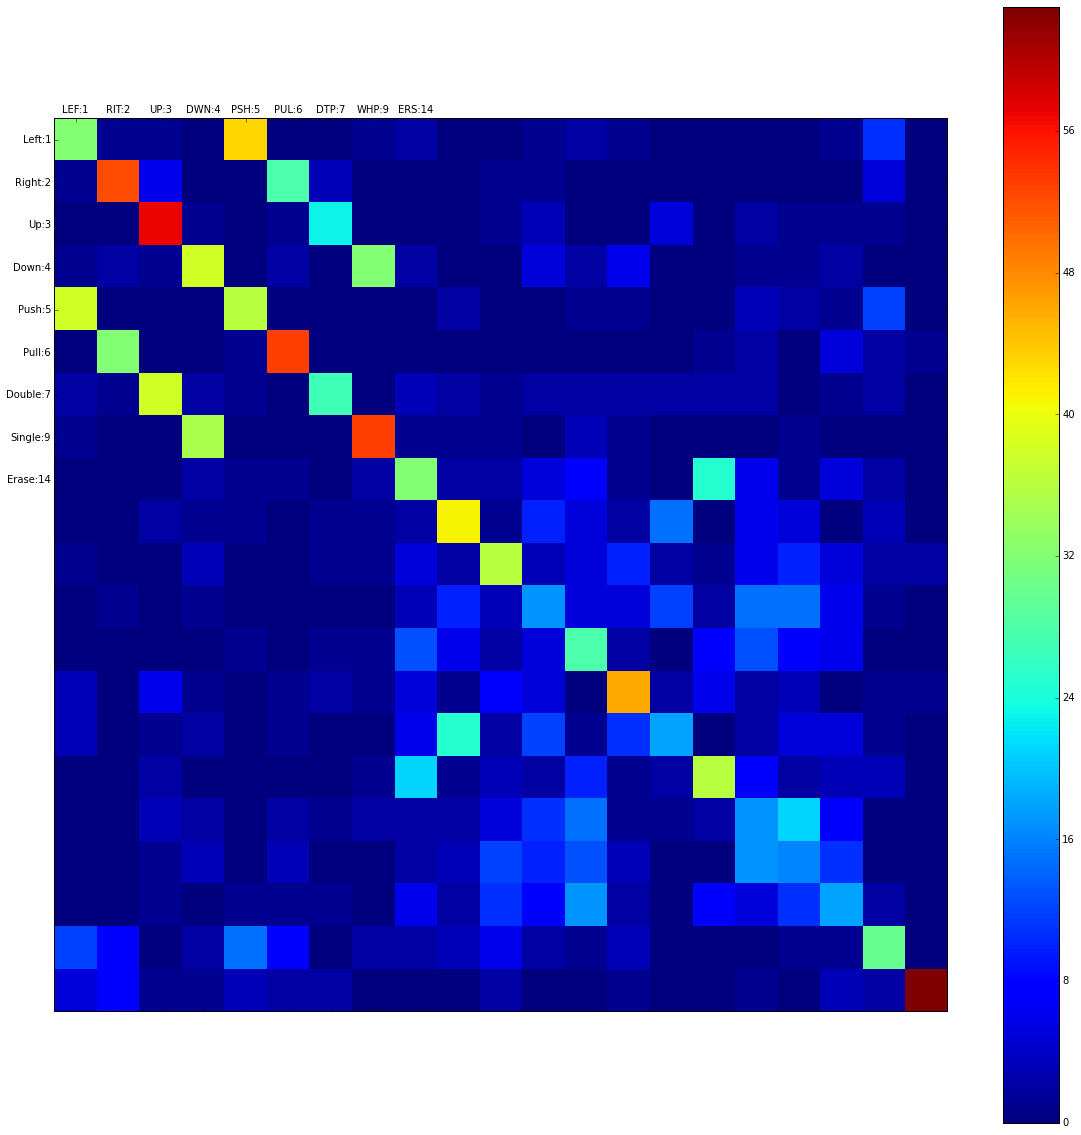

In [12]:
from matplotlib import pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

# pca_obj = PCA(n_components=50)

clf_best = RandomForestClassifier(n_estimators=100, n_jobs = -1)
# clf_best = KNeighborsClassifier(n_neighbors=7)
# clf_best = SVC(kernel='linear',C=10.0, gamma=0.1, degree=3)
# clf_best = grdobj.best_estimator_

cv = StratifiedKFold(y, n_folds=10)
yhat = np.zeros(y.shape)

for train, test in cv:
    clf_best.fit(Xnew[train],y[train])
    yhat[test] = clf_best.predict(Xnew[test])
    
conf = confusion_matrix(y,yhat)
print accuracy_score(y, yhat)

for i in range(len(conf)):
    s = np.sum(conf[i])
    for j in range(len(conf[i])):
        conf[i][j] = 100 * conf[i][j] / float(s)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf)
ax.set_xticks(range(len(longNamesYYC)))
ax.set_yticks(range(len(longNamesC)))
ax.set_xticklabels(longNamesYYC)
ax.set_yticklabels(longNamesC)
fig.colorbar(cax)
plt.show()

0.359523809524


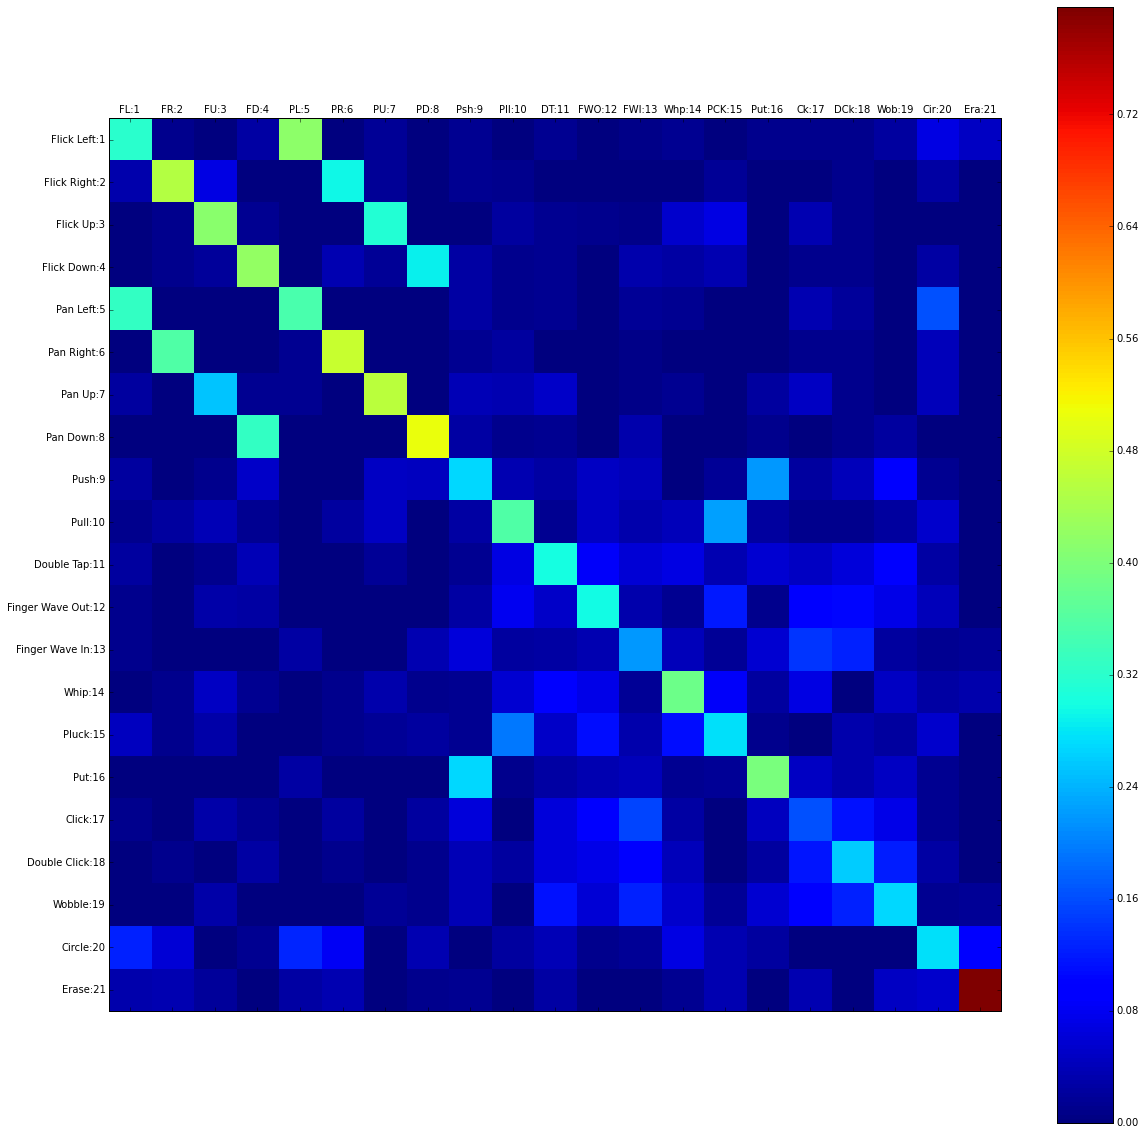

In [5]:
# confusion matrix normalized

conf = confusion_matrix(y,yhat)
print accuracy_score(y,yhat)

conf_normalized = conf.astype(np.float)
for i in range(conf.shape[0]):
    conf_normalized[:,i] = conf_normalized[:,i] / np.sum(conf[:,i] )


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_normalized)
ax.set_xticks(range(len(longNamesYY)))
ax.set_yticks(range(len(longNames)))
ax.set_xticklabels(longNamesYY)
ax.set_yticklabels(longNames)
fig.colorbar(cax)
plt.show()

In [7]:
#Map between users and their test ids
userMap = np.array([
    [36, 37, 43, 47, 52, 56, 60, 64, 91, 92],
    [38, 39, 42, 46, 51, 55, 59, 63, 67, 70],
    [40, 45, 49, 54, 58, 62, 66, 69, 73, 75],
    [41, 44, 48, 53, 57, 61, 65, 68, 71, 74],
    [72, 76, 77, 78, 79, 80, 81, 82, 83, 84],
    [85, 86, 87, 88, 89, 90, 94, 95, 96, 97],
    [93, 100, 102, 110, 111, 112, 113, 114, 115, 116],
    [98, 99, 101, 103, 104, 105, 106, 107, 108, 109] ])

testToUser = np.zeros(80)
for i in range(8):
    for j in range(10):
        if userMap[i][j] > 50:
            testToUser[userMap[i][j] - 37] = i
        else:
            testToUser[userMap[i][j] - 36] = i

print testToUser
testToUser = np.tile(testToUser, 21)
print len(testToUser)

[ 0.  0.  1.  1.  2.  3.  1.  0.  3.  2.  1.  0.  3.  2.  1.  0.  3.  2.
  1.  0.  3.  2.  1.  0.  3.  2.  1.  0.  3.  2.  1.  3.  2.  1.  3.  4.
  2.  3.  2.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.
  0.  0.  6.  5.  5.  5.  5.  7.  7.  6.  7.  6.  7.  7.  7.  7.  7.  7.
  7.  6.  6.  6.  6.  6.  6.  6.]
1680


In [8]:
# reduced gesture set
longNamesC = ["Left:1",
    "Right:2",
    "Up:3",
    "Down:4",
    "Push:5",
    "Pull:6",
    "Double:7",
    "Single:9",
#    "Finger:10",
#    "Double Click:11",
#    "Wobble:12",
#    "Circle:13",
    "Erase:14"]

longNamesYYC = ["LEF:1",
    "RIT:2",
    "UP:3",
    "DWN:4",
    "PSH:5",
    "PUL:6",
    "DTP:7",
    "WHP:9",
#    "FIN:10",
#    "DCL:11",
#    "WOB:12",
#    "CRC:13",
    "ERS:14"]

#remapping
y = pickle.load(open('correct_80.p'))
ycombined = np.copy(y)
ycombined[y == 4] = 0.0 #l/r/u/d combined
ycombined[y == 5] = 1.0
ycombined[y == 6] = 2.0
ycombined[y == 7] = 3.0
ycombined[y == 8] = 4.0 #push
ycombined[y == 9] = 5.0 #pull
ycombined[y == 10] = 6.0 #dtap
ycombined[y == 11] = 7.0 #wave out
ycombined[y == 12] = 7.0 #wave in
ycombined[y == 13] = 8.0 #whip
ycombined[y == 14] = 5.0 #pluck
ycombined[y == 15] = 4.0 #put
ycombined[y == 16] = 8.0 #click
ycombined[y == 17] = 6.0 #dclick
ycombined[y == 18] = 7.0 #wobble
ycombined[y == 19] = 7.0 #circle
ycombined[y == 20] = 10.0 #erase

toRemove = ycombined != 7
ycombined = ycombined[toRemove]
Xcomb = X[toRemove]
tTUC = testToUser[toRemove]

for i in np.unique(ycombined):
    print len(ycombined[ycombined == i])

160
160
160
160
160
160
160
160
80


0.647058823529


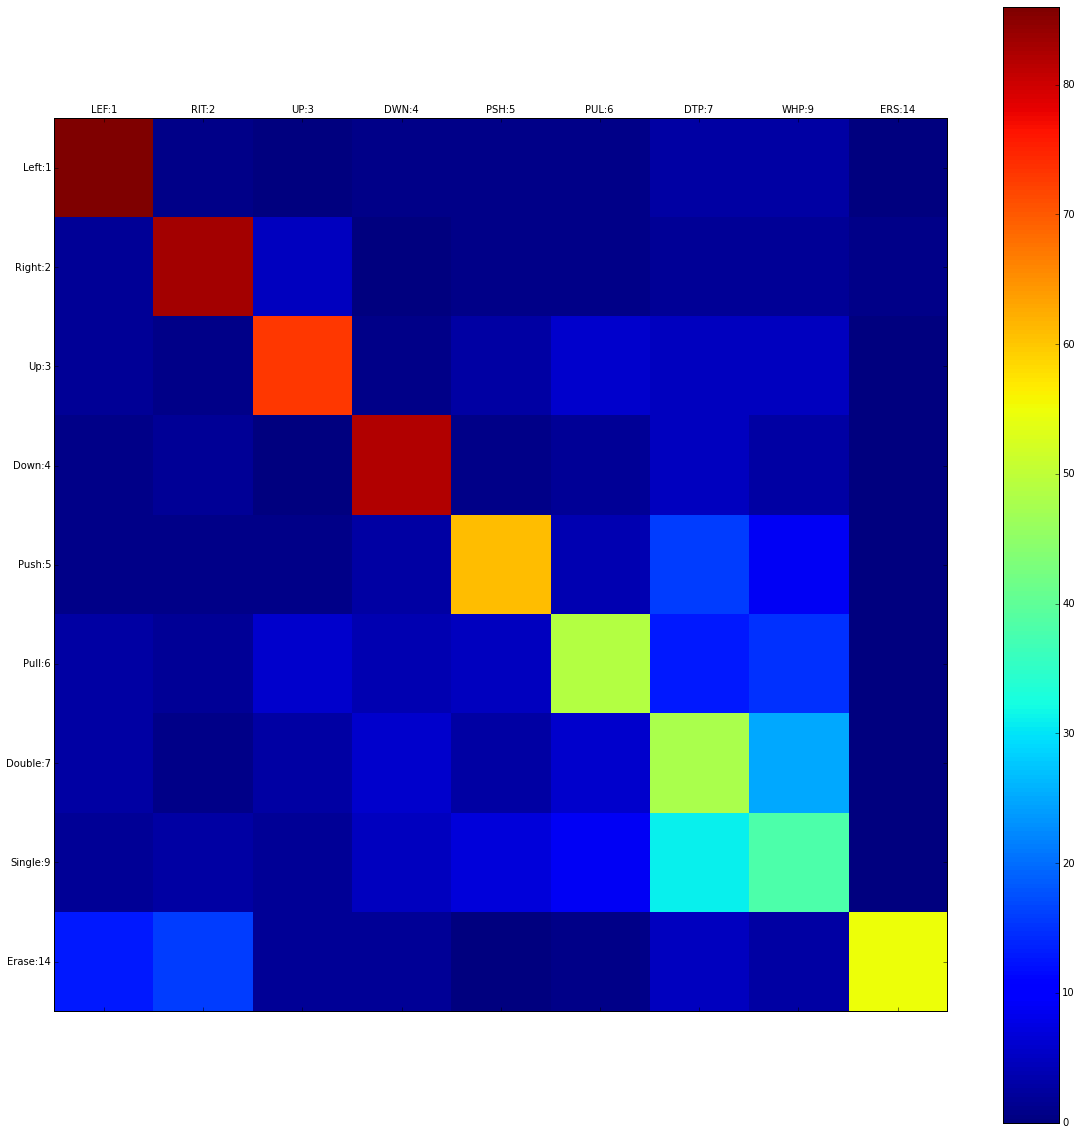

In [13]:
# across user 

from matplotlib import pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

# pca_obj = PCA(n_components=50)

clf_best = RandomForestClassifier(n_estimators=100, n_jobs = -1)
# clf_best = KNeighborsClassifier(n_neighbors=7)
# clf_best = SVC(kernel='linear',C=10.0, gamma=0.1, degree=3)
# clf_best = grdobj.best_estimator_

yhat = np.zeros(ycombined.shape)

user = np.arange(8) # 8 users
for u in user:
    test = np.where(tTUC==u)
    train = np.where(tTUC!=u)
    clf_best.fit(Xcomb[train],ycombined[train])
    yhat[test] = clf_best.predict(Xcomb[test])
    
conf = confusion_matrix(ycombined,yhat)
print accuracy_score(ycombined,yhat)

for i in range(len(conf)):
    s = np.sum(conf[i])
    for j in range(len(conf[i])):
        conf[i][j] = 100 * conf[i][j] / float(s)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf)
ax.set_xticks(range(len(longNamesYYC)))
ax.set_yticks(range(len(longNamesC)))
ax.set_xticklabels(longNamesYYC)
ax.set_yticklabels(longNamesC)
fig.colorbar(cax)
plt.show()

0.270238095238


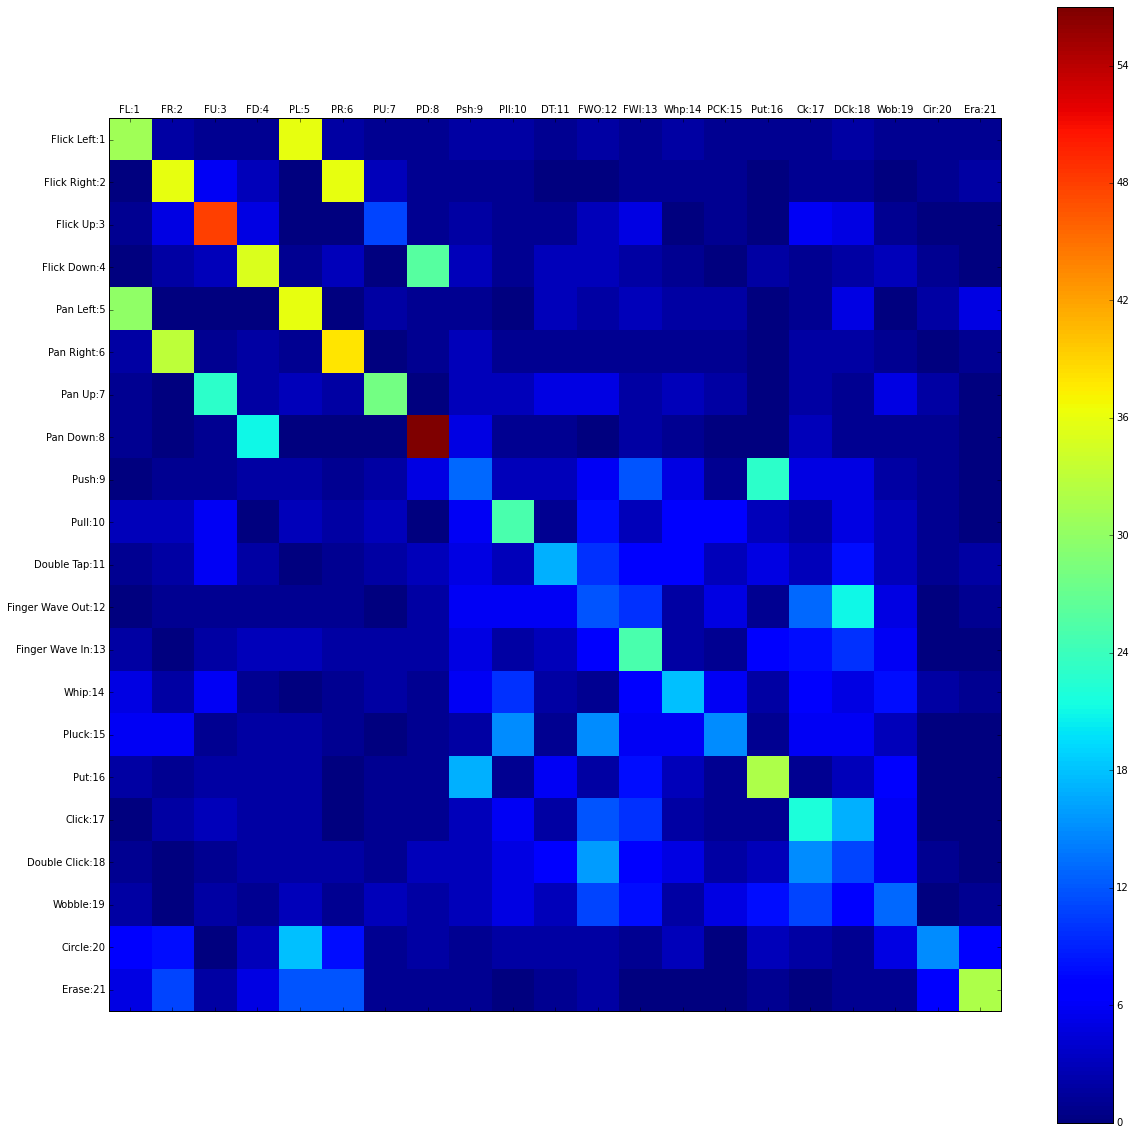

In [10]:
from matplotlib import pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# per user calibration
clf_best = RandomForestClassifier(n_estimators=50, n_jobs = -1)
# clf_best = KNeighborsClassifier(n_neighbors=7)
# clf_best = SVC(kernel='linear',C=10.0, gamma=0.1, degree=3)
# clf_best = grdobj.best_estimator_

yhat = np.zeros(y.shape)

user = np.arange(8)
for u in user:
    user_indices = np.where(testToUser==u)
    Xuser = X[user_indices]
    yuser = y[user_indices]
    cv = StratifiedKFold(y[user_indices], n_folds=10)
    yhat_user = np.zeros(yuser.shape)
    for trainf, test in cv:
        clf_best.fit(Xuser[trainf],yuser[trainf])
        yhat_user[test] = clf_best.predict(Xuser[test])
    yhat[user_indices] = yhat_user
    
    
conf = confusion_matrix(y,yhat)
print accuracy_score(y,yhat)

for i in range(len(conf)):
    s = np.sum(conf[i])
    for j in range(len(conf[i])):
        conf[i][j] = 100 * conf[i][j] / float(s)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf)
ax.set_xticks(range(len(longNamesYY)))
ax.set_yticks(range(len(longNames)))
ax.set_xticklabels(longNamesYY)
ax.set_yticklabels(longNames)
fig.colorbar(cax)
plt.show()